In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten,Dropout,Input
from keras.applications import DenseNet201
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=0.2,shear_range=0.2,zoom_range=0.2,width_shift_range=0.2,
                               height_shift_range=0.2,validation_split=0.2)

batch_size = 10

train_data = train_datagen.flow_from_directory('drowsiness data/train',target_size=(80,80),batch_size=batch_size,
                                               class_mode='binary',subset='training')

validation_data = train_datagen.flow_from_directory('drowsiness data/train',target_size=(80,80),batch_size=batch_size,
                                               class_mode='binary',subset='validation')

Found 16442 images belonging to 2 classes.
Found 4109 images belonging to 2 classes.


In [3]:
test_datagen =ImageDataGenerator(rescale=1./255)
test_data=test_datagen.flow_from_directory('drowsiness data/test',target_size=(80,80),batch_size=batch_size,
                                               class_mode='binary',subset='training')

Found 3129 images belonging to 2 classes.


In [4]:
train_data.image_shape

(80, 80, 3)

In [5]:
pre_trained_model = DenseNet201(input_shape=(80, 80, 3), include_top=False, weights="imagenet")

In [6]:
pre_trained_model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 86, 86, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 40, 40, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 40, 40, 64)   256         ['conv1/conv[0][0]']             
                                                                                        

 conv2_block4_1_bn (BatchNormal  (None, 20, 20, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 20, 20, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_2_conv (Conv2D)   (None, 20, 20, 32)   36864       ['conv2_block4_1_relu[0][0]']    
                                                                                                  
 conv2_block4_concat (Concatena  (None, 20, 20, 192)  0          ['conv2_block3_concat[0][0]',    
 te)                                                              'conv2_block4_2_conv[0][0]']    
          

                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 10, 10, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 10, 10, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 10, 10, 32)   36864       ['conv3_block2_1_relu[0][0]']    
                                                                                                  
 conv3_block2_concat (Concatena  (None, 10, 10, 192)  0          ['conv3_block1_concat[0][0]',    
 te)      

 conv3_block6_2_conv (Conv2D)   (None, 10, 10, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 10, 10, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 10, 10, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block7_0_relu (Activatio  (None, 10, 10, 320)  0          ['conv3_block7_0_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block11_0_relu (Activati  (None, 10, 10, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 10, 10, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_block11_1_bn (BatchNorma  (None, 10, 10, 128)  512        ['conv3_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_1_relu (Activati  (None, 10, 10, 128)  0          ['conv3_block11_1_bn[0][0]']     
 on)      

 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 5, 5, 320)   0           ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 5, 5, 128)    40960       ['conv4_block3_0_relu[0][0]']    
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, 5, 5, 128)   512         ['conv4_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

 conv4_block7_1_bn (BatchNormal  (None, 5, 5, 128)   512         ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 5, 5, 128)   0           ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 5, 5, 32)     36864       ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_block7_concat (Concatena  (None, 5, 5, 480)   0           ['conv4_block6_concat[0][0]',    
 te)                                                              'conv4_block7_2_conv[0][0]']    
          

                                                                                                  
 conv4_block11_concat (Concaten  (None, 5, 5, 608)   0           ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 5, 5, 608)   2432        ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block12_0_relu (Activati  (None, 5, 5, 608)   0           ['conv4_block12_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block16_0_relu (Activati  (None, 5, 5, 736)   0           ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 5, 5, 128)    94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 5, 5, 128)   512         ['conv4_block16_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_1_relu (Activati  (None, 5, 5, 128)   0           ['conv4_block16_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block20_1_relu (Activati  (None, 5, 5, 128)   0           ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 5, 5, 32)     36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_block20_concat (Concaten  (None, 5, 5, 896)   0           ['conv4_block19_concat[0][0]',   
 ate)                                                             'conv4_block20_2_conv[0][0]']   
                                                                                                  
 conv4_block21_0_bn (BatchNorma  (None, 5, 5, 896)   3584        ['conv4_block20_concat[0][0]']   
 lization)

 ate)                                                             'conv4_block24_2_conv[0][0]']   
                                                                                                  
 conv4_block25_0_bn (BatchNorma  (None, 5, 5, 1024)  4096        ['conv4_block24_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block25_0_relu (Activati  (None, 5, 5, 1024)  0           ['conv4_block25_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block25_1_conv (Conv2D)  (None, 5, 5, 128)    131072      ['conv4_block25_0_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block29_1_conv (Conv2D)  (None, 5, 5, 128)    147456      ['conv4_block29_0_relu[0][0]']   
                                                                                                  
 conv4_block29_1_bn (BatchNorma  (None, 5, 5, 128)   512         ['conv4_block29_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block29_1_relu (Activati  (None, 5, 5, 128)   0           ['conv4_block29_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block29_2_conv (Conv2D)  (None, 5, 5, 32)     36864       ['conv4_block29_1_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv4_block33_2_conv (Conv2D)  (None, 5, 5, 32)     36864       ['conv4_block33_1_relu[0][0]']   
                                                                                                  
 conv4_block33_concat (Concaten  (None, 5, 5, 1312)  0           ['conv4_block32_concat[0][0]',   
 ate)                                                             'conv4_block33_2_conv[0][0]']   
                                                                                                  
 conv4_block34_0_bn (BatchNorma  (None, 5, 5, 1312)  5248        ['conv4_block33_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block38_0_bn (BatchNorma  (None, 5, 5, 1440)  5760        ['conv4_block37_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block38_0_relu (Activati  (None, 5, 5, 1440)  0           ['conv4_block38_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block38_1_conv (Conv2D)  (None, 5, 5, 128)    184320      ['conv4_block38_0_relu[0][0]']   
                                                                                                  
 conv4_block38_1_bn (BatchNorma  (None, 5, 5, 128)   512         ['conv4_block38_1_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block42_1_bn (BatchNorma  (None, 5, 5, 128)   512         ['conv4_block42_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block42_1_relu (Activati  (None, 5, 5, 128)   0           ['conv4_block42_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block42_2_conv (Conv2D)  (None, 5, 5, 32)     36864       ['conv4_block42_1_relu[0][0]']   
                                                                                                  
 conv4_block42_concat (Concaten  (None, 5, 5, 1600)  0           ['conv4_block41_concat[0][0]',   
 ate)     

 conv4_block46_2_conv (Conv2D)  (None, 5, 5, 32)     36864       ['conv4_block46_1_relu[0][0]']   
                                                                                                  
 conv4_block46_concat (Concaten  (None, 5, 5, 1728)  0           ['conv4_block45_concat[0][0]',   
 ate)                                                             'conv4_block46_2_conv[0][0]']   
                                                                                                  
 conv4_block47_0_bn (BatchNorma  (None, 5, 5, 1728)  6912        ['conv4_block46_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block47_0_relu (Activati  (None, 5, 5, 1728)  0           ['conv4_block47_0_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, 2, 2, 32)     36864       ['conv5_block2_1_relu[0][0]']    
                                                                                                  
 conv5_block2_concat (Concatena  (None, 2, 2, 960)   0           ['conv5_block1_concat[0][0]',    
 te)                                                              'conv5_block2_2_conv[0][0]']    
                                                                                                  
 conv5_block3_0_bn (BatchNormal  (None, 2, 2, 960)   3840        ['conv5_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block3_0_relu (Activatio  (None, 2, 2, 960)   0           ['conv5_block3_0_bn[0][0]']      
 n)       

 ization)                                                                                         
                                                                                                  
 conv5_block7_0_relu (Activatio  (None, 2, 2, 1088)  0           ['conv5_block7_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block7_1_conv (Conv2D)   (None, 2, 2, 128)    139264      ['conv5_block7_0_relu[0][0]']    
                                                                                                  
 conv5_block7_1_bn (BatchNormal  (None, 2, 2, 128)   512         ['conv5_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_blo

 conv5_block11_1_bn (BatchNorma  (None, 2, 2, 128)   512         ['conv5_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block11_1_relu (Activati  (None, 2, 2, 128)   0           ['conv5_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block11_2_conv (Conv2D)  (None, 2, 2, 32)     36864       ['conv5_block11_1_relu[0][0]']   
                                                                                                  
 conv5_block11_concat (Concaten  (None, 2, 2, 1248)  0           ['conv5_block10_concat[0][0]',   
 ate)                                                             'conv5_block11_2_conv[0][0]']   
          

                                                                                                  
 conv5_block15_concat (Concaten  (None, 2, 2, 1376)  0           ['conv5_block14_concat[0][0]',   
 ate)                                                             'conv5_block15_2_conv[0][0]']   
                                                                                                  
 conv5_block16_0_bn (BatchNorma  (None, 2, 2, 1376)  5504        ['conv5_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block16_0_relu (Activati  (None, 2, 2, 1376)  0           ['conv5_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_blo

 conv5_block20_0_relu (Activati  (None, 2, 2, 1504)  0           ['conv5_block20_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block20_1_conv (Conv2D)  (None, 2, 2, 128)    192512      ['conv5_block20_0_relu[0][0]']   
                                                                                                  
 conv5_block20_1_bn (BatchNorma  (None, 2, 2, 128)   512         ['conv5_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block20_1_relu (Activati  (None, 2, 2, 128)   0           ['conv5_block20_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv5_block24_1_relu (Activati  (None, 2, 2, 128)   0           ['conv5_block24_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block24_2_conv (Conv2D)  (None, 2, 2, 32)     36864       ['conv5_block24_1_relu[0][0]']   
                                                                                                  
 conv5_block24_concat (Concaten  (None, 2, 2, 1664)  0           ['conv5_block23_concat[0][0]',   
 ate)                                                             'conv5_block24_2_conv[0][0]']   
                                                                                                  
 conv5_block25_0_bn (BatchNorma  (None, 2, 2, 1664)  6656        ['conv5_block24_concat[0][0]']   
 lization)

 ate)                                                             'conv5_block28_2_conv[0][0]']   
                                                                                                  
 conv5_block29_0_bn (BatchNorma  (None, 2, 2, 1792)  7168        ['conv5_block28_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block29_0_relu (Activati  (None, 2, 2, 1792)  0           ['conv5_block29_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block29_1_conv (Conv2D)  (None, 2, 2, 128)    229376      ['conv5_block29_0_relu[0][0]']   
                                                                                                  
 conv5_blo

Total params: 18,321,984
Trainable params: 18,092,928
Non-trainable params: 229,056
__________________________________________________________________________________________________


In [7]:
for layer in pre_trained_model.layers:
#     print(layer.name)
    layer.trainable=False
    
print(pre_trained_model.output.shape)

(None, 2, 2, 1920)


In [8]:
model=Sequential()
model.add(pre_trained_model)
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 2, 2, 1920)        18321984  
                                                                 
 flatten (Flatten)           (None, 7680)              0         
                                                                 
 dense (Dense)               (None, 64)                491584    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [12]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
earlystopping = EarlyStopping(monitor='val_loss',patience=5,verbose=1,restore_best_weights=False)
learning_rate = ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=3)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_data,epochs=20,validation_data=validation_data,callbacks=[earlystopping,learning_rate])

Epoch 1/20
1645/1645 [==============================] - 518s 296ms/step - loss: 0.2213 - accuracy: 0.8972 - val_loss: 0.6384 - val_accuracy: 0.8520 - lr: 0.0010
Epoch 2/20
1645/1645 [==============================] - 478s 290ms/step - loss: 0.2240 - accuracy: 0.8983 - val_loss: 0.4667 - val_accuracy: 0.8579 - lr: 0.0010
Epoch 3/20
1645/1645 [==============================] - 481s 293ms/step - loss: 0.2143 - accuracy: 0.8988 - val_loss: 0.4962 - val_accuracy: 0.8739 - lr: 0.0010
Epoch 4/20
1645/1645 [==============================] - 898s 546ms/step - loss: 0.2126 - accuracy: 0.9010 - val_loss: 0.5888 - val_accuracy: 0.8530 - lr: 0.0010
Epoch 5/20
1645/1645 [==============================] - ETA: 0s - loss: 0.2136 - accuracy: 0.9029
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1645/1645 [==============================] - 478s 290ms/step - loss: 0.2136 - accuracy: 0.9029 - val_loss: 0.5542 - val_accuracy: 0.8477 - lr: 0.0010
Epoch 6/20
1645/1645 [=========

In [ ]:
# 8479,9304 for 64,64

In [13]:
pred=model.predict(test_data)
opn=[]
closen= []
for p in pred:
    if p[0]>=0.5:
        opn.append(1)
    else:
        closen.append(0)
        
print(len(opn))
print(len(closen))

313/313 [==============================] - 100s 298ms/step
1287
1842


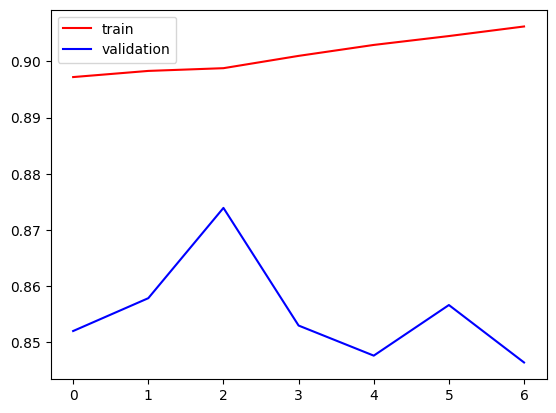

In [14]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

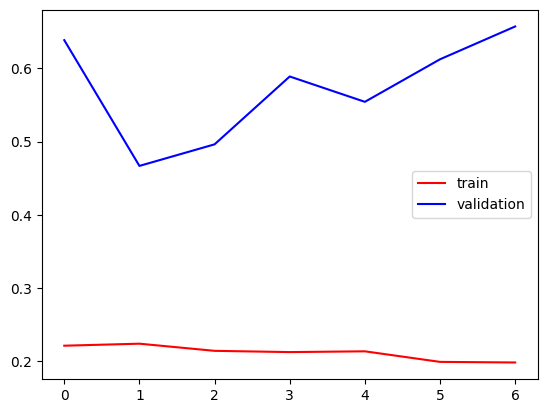

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
model.save("densnet.h5")